In [1]:
countries = ['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Korea, Rep.',
 'Kuwait',
 'Kyrgyz Republic',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Samoa',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela, RB',
 'Vietnam',
 'Yemen, Rep.',
 'Zambia',
 'Zimbabwe']

In [2]:
#create a dataframe with country names and the country's population
import pandas as pd

#create dataframe pop with countries we are interested in
mort= {'Country Name': countries}
pop = pd.DataFrame(mort)


In [3]:
# #defining a function that takes in a csv file, grabs the data from the column we are interested in, and adds it to our dataframe
def new_column(name, csv, column):
    df = pd.read_csv(csv)  #get csv, turn info into dataframe
    df = df[['Country Name', column]]  #new dataframe with column we are interested in

    df_countries = df['Country Name'].tolist()  #get a list of all country values from dataframe
    df_vals = []  #start empty list for values we are interested in

    for country in countries:  #countries that we want to focus on
        try:
            index = df_countries.index(country)  #if the country from the new df is in the country list we are interested in, we append that country's info to list
            df_vals.append(df.loc[index, column])

        except:
            print(country)  #otherwise, nothing        
    
    if len(df_vals) == 175:  #length of countries list
        pop[name] = df_vals
    else:
        return len(df_vals)

In [4]:
new_column('mortality_rate', 'mortality2.csv', '2015')  #add mortality rate
new_column('fertility_rate', 'fertility_rate.csv', '2015 [YR2015]')  #add fertility rates
new_column('population', 'popmean.csv', '2015 [YR2015]')  #add population
new_column('hc_expend', 'healthcare_expenditure.csv', '2015')  #add healthcare expenditure
new_column('w_lit_pop', 'fertilewomen - fertilewomen3.csv', 'Women Lit Pop')  #add women literate population
new_column('fertile_women_pop', 'fertilewomen - fertilewomen2.csv', 'Women Who are fertile')  #add fertile women population
new_column('maternity_leaves', 'matleave2.csv', '2015')  #add whether or not they offer maternity leaves
new_column('gdp','countrygdp.csv', '2015 [YR2015]')  #add gdp

In [5]:
#healthcare csv was weird so we got a list of countries with universal healthcare and created a for loop
#corresponding countries with universal healthcare with a value of 1, otherwise giving the country a value of 0

healthcare_countries = ['Norway', 'New Zealand', 'Japan', 'Germany', 'Belgium', 'United Kingdom', 'Kuwait', 'Sweden', 'Bahrain', 'Brunei', 'Canada', 'Netherlands', 'Austria', 'United Arab Emirates', 'Finland', 'Slovenia', 'Denmark', 'Luxembourg', 'France', 'Australia', 'Ireland', 'Italy', 'Portugal', 'Cyprus', 'Greece', 'Spain', 'South Korea', 'Iceland', 'Hong Kong', 'Singapore', 'Switzerland', 'Israel']

countries_test1 = countries.copy()
for country in countries:
    if country in healthcare_countries:
        countries_test1[countries.index(country)] = 1
    else:
        countries_test1[countries.index(country)] = 0

pop['healthcare'] = countries_test1

In [6]:
import numpy as np
pop.replace(to_replace='..', value=np.nan, inplace=True)  #replacing '..' with nan values

pop['w_lit_pop'].replace(0, np.nan, inplace=True)    #csv with women's literacy rates recorded 0 for countries with no recorded literacy rates. we don't want to interpret that as a literacy population of 0, so we change to non values


#turning column floats into numeric values and getting rid of rows with null values
pop['maternity_leaves']= pd.to_numeric(pop['maternity_leaves'])     
pop= pop[pop['maternity_leaves'].notnull()]
pop['maternity_leaves']= pop['maternity_leaves'].astype(int)

pop["gdp"] = pd.to_numeric(pop["gdp"])
pop= pop[pop['gdp'].notnull()]

pop['population']= pd.to_numeric(pop['population'])
pop= pop[pop['population'].notnull()]

pop['hc_expend']= pd.to_numeric(pop['hc_expend'])
pop= pop[pop['hc_expend'].notnull()]


#change order of variables
pop= pop[['Country Name', 'population', 'w_lit_pop', 'fertile_women_pop', 'fertility_rate', 'maternity_leaves', 'gdp', 'healthcare', 'hc_expend', 'mortality_rate']]


In [7]:
pop.head()

,Country Name,population,w_lit_pop,fertile_women_pop,fertility_rate,maternity_leaves,gdp,healthcare,hc_expend,mortality_rate
0,Afghanistan,33736494,NaN,7.586627e+06,4.8,1,569.577923,0,60.088813,396.0
1,Albania,2880703,NaN,7.070754e+05,1.7,1,3952.830781,0,265.903236,29.0
2,Algeria,39871528,NaN,1.073062e+07,2.8,1,4160.220067,0,291.635898,140.0
3,Angola,27859305,NaN,6.348298e+06,5.8,1,3683.552607,0,108.559535,477.0
4,Argentina,43417765,NaN,1.080426e+07,2.3,1,13698.293438,0,997.931375,52.0


In [8]:
#ALL RELEVANT LIBRARIES
import seaborn as sns
sns.set(style='ticks', color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

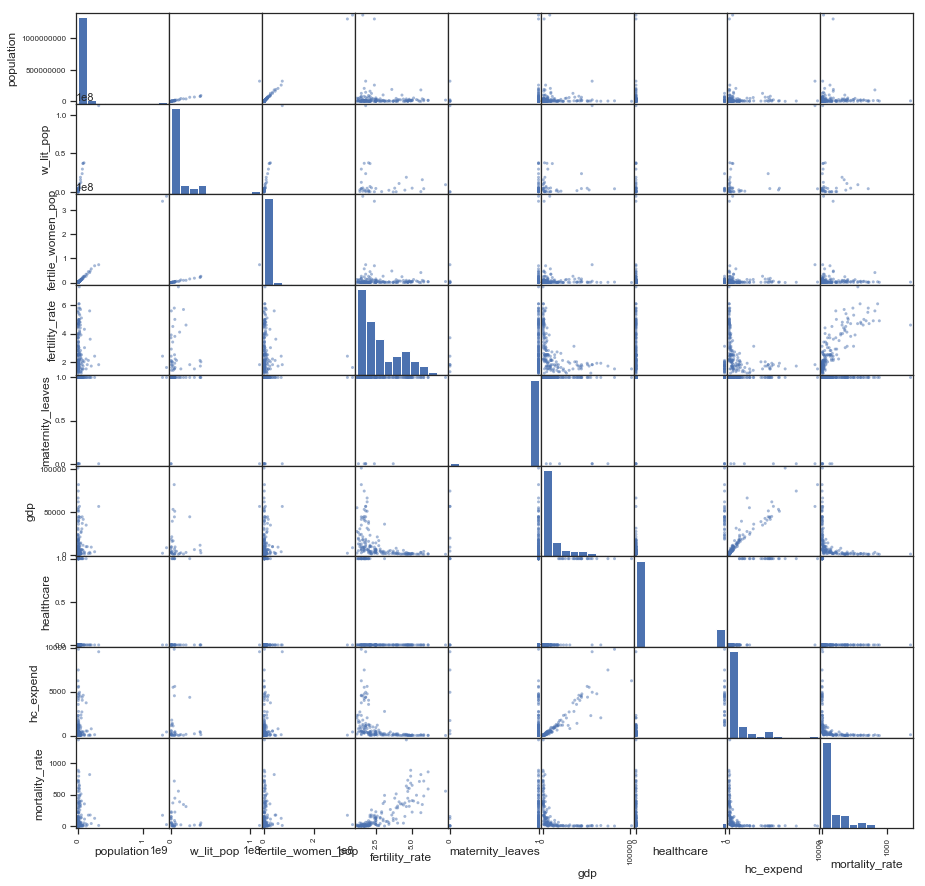

In [9]:
#Creating multi-scatter plot
popid= pop.iloc[:,1:]
pd.plotting.scatter_matrix(popid, figsize=[15,15]);

In [10]:
#set correlation above 0.75 and see true/false values
abs(popid.corr())> 0.70

,population,w_lit_pop,fertile_women_pop,fertility_rate,maternity_leaves,gdp,healthcare,hc_expend,mortality_rate
population,True,True,True,False,False,False,False,False,False
w_lit_pop,True,True,True,False,False,False,False,False,False
fertile_women_pop,True,True,True,False,False,False,False,False,False
fertility_rate,False,False,False,True,False,False,False,False,True
maternity_leaves,False,False,False,False,True,False,False,False,False
gdp,False,False,False,False,False,True,True,True,False
healthcare,False,False,False,False,False,True,True,True,False
hc_expend,False,False,False,False,False,True,True,True,False
mortality_rate,False,False,False,True,False,False,False,False,True


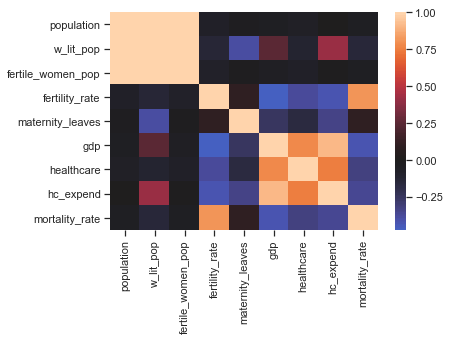

In [11]:
sns.heatmap(popid.corr(), center=0);

In [12]:
#transform fertility_rate so it matches unit test
pop['fertility_rate']= pop['fertility_rate']**2

In [13]:
#Setting up columns for test-train-split
cols= ['gdp', 'healthcare', 'hc_expend', 'fertility_rate', 'population', 'fertile_women_pop', 'maternity_leaves', 'mortality_rate']
pop[cols]

,gdp,healthcare,hc_expend,fertility_rate,population,fertile_women_pop,maternity_leaves,mortality_rate
0,569.577923,0,60.088813,23.04,33736494,7.586627e+06,1,396.0
1,3952.830781,0,265.903236,2.89,2880703,7.070754e+05,1,29.0
2,4160.220067,0,291.635898,7.84,39871528,1.073062e+07,1,140.0
3,3683.552607,0,108.559535,33.64,27859305,6.348298e+06,1,477.0
4,13698.293438,0,997.931375,5.29,43417765,1.080426e+07,1,52.0
5,3617.935746,0,366.049248,2.56,2916950,7.696985e+05,1,25.0
6,56561.412382,1,4934.047418,3.24,23850784,5.698498e+06,0,6.0
7,44206.784282,1,4536.077437,2.25,8642699,1.992798e+06,1,4.0
8,5500.310382,0,368.339353,3.61,9649341,2.677222e+06,1,25.0
9,22688.878244,1,1190.041592,4.41,1371855,3.150964e+05,1,15.0


In [14]:
#Setting up for test-train-split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data= pd.concat([pop[cols]])
y= data[['mortality_rate']]
x= data.drop(['mortality_rate'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(data, y, test_size= 0.2, random_state= 14)
print('Before scale:')
print ('training set: ',X_train.shape, y_train.shape)
print ('testing set: ',X_test.shape, y_test.shape)
print('shape of data: ',data.shape)
print('-------------------------')
scl= StandardScaler()
Xt_train= scl.fit_transform(X_train)
Xt_test= scl.fit_transform(X_test)
yt_train= scl.fit_transform(y_train)
regressor= LinearRegression()
regressor.fit(Xt_train, yt_train)
print('After scale:')
print ('training scaled set: ',Xt_train.shape, yt_train.shape)
print ('testing scaled set: ',Xt_test.shape, y_test.shape)


Before scale:
training set:  (132, 8) (132, 1)
testing set:  (33, 8) (33, 1)
shape of data:  (165, 8)
-------------------------


/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


After scale:
training scaled set:  (132, 8) (132, 1)
testing scaled set:  (33, 8) (33, 1)


In [15]:
Xt_train #shows scaled version

array([[ 0.38660116, -0.47140452,  0.07225248, ..., -0.08573808,
         0.19841895, -0.71420042],
       [-0.03918241, -0.47140452, -0.14197799, ..., -0.06157479,
         0.19841895, -0.75585744],
       [-0.49405628, -0.47140452, -0.50797854, ..., -0.14713342,
         0.19841895, -0.63088639],
       ...,
       [-0.38420323, -0.47140452, -0.38184469, ..., -0.21894821,
         0.19841895, -0.75122888],
       [-0.67341702, -0.47140452, -0.56017851, ..., -0.13607101,
         0.19841895,  0.86413763],
       [-0.58627205, -0.47140452, -0.48368651, ..., -0.23278426,
         0.19841895, -0.07545951]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           1.66e-34
Time:                        17:58:01   Log-Likelihood:                -820.40
No. Observations:                 132   AIC:                             1645.
Df Residuals:                     130   BIC:                             1651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.1640     15.205     -1.129      0.261     -47.246      12.918
fertility_rate    18.6029      1.104     16.855      0.000      16.419      20.786
==============================================================================
Omnibus:                       19.506   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.329
Skew:                           0.482   Prob(JB):                     1.59e-12
Kurtosis:                       5.991   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

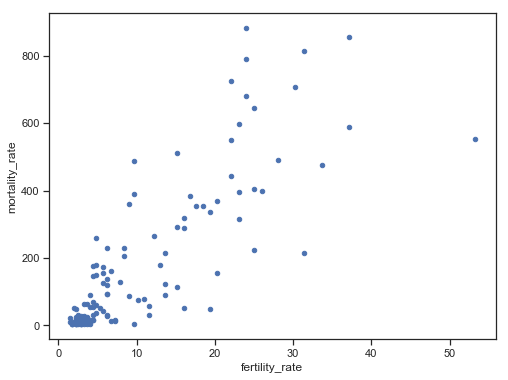

In [16]:
#testing for idx fertility_rate with target maternal mortality_rate
f= 'mortality_rate~fertility_rate'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

model= ols(formula=f, data=X_train).fit()

mrfr = X_train.plot(kind='scatter', x='fertility_rate', y='mortality_rate', alpha=1) #scatter plot fertile rate vs. mortality rate
model.summary()



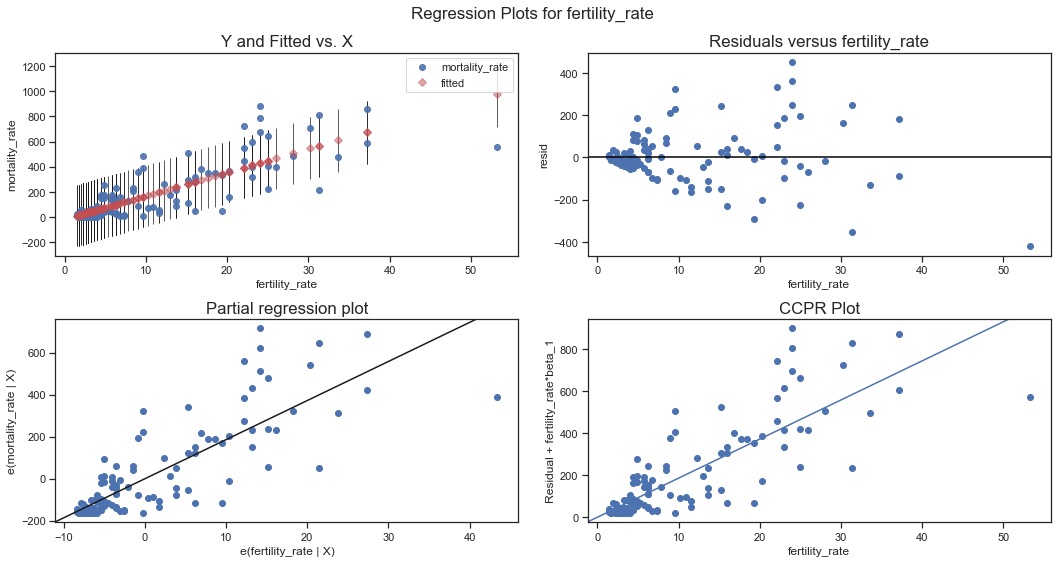

In [17]:
fig= plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'fertility_rate', fig=fig)
plt.show()

In [18]:
#Comparing gdp with hc_expenditure to see if there is a relationship
features= ['gdp']
X = X_train[features]
Y = X_train.hc_expend

X_sm = X_train[features]
y_sm = X_train.hc_expend
X_sm = sm.add_constant(X_sm) #this constant is the intercept
sm_model = sm.OLS(y_sm, X_sm).fit()
print(sm_model.summary())
print(sm_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:              hc_expend   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     647.9
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           2.40e-52
Time:                        17:58:02   Log-Likelihood:                -1062.6
No. Observations:                 132   AIC:                             2129.
Df Residuals:                     130   BIC:                             2135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -115.3411     80.965     -1.425      0.1

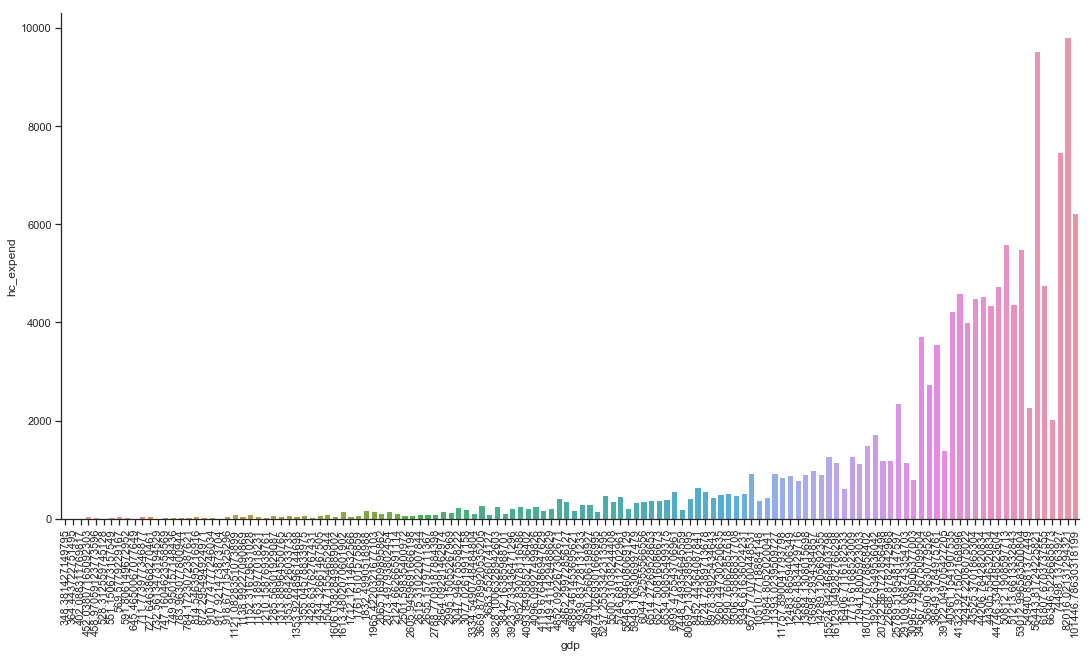

In [19]:
gdp_hc= sns.catplot(y="hc_expend", x="gdp", kind="bar", height=8,aspect=2, data=X_train);
gdp_hc.set_xticklabels(rotation=90)

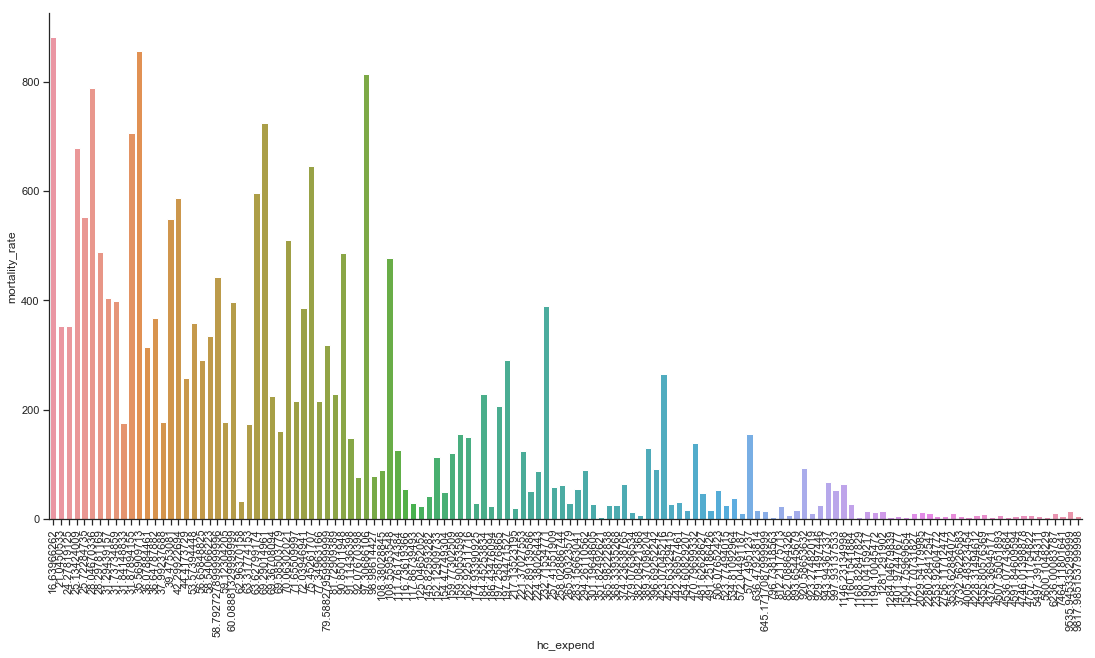

In [20]:
#The graph below shows relationship with health care expendature and maternal mortility rate
mr_hc=sns.catplot(y="mortality_rate", x="hc_expend", kind="bar", height= 8,aspect=2, data=X_train);
mr_hc.set_xticklabels(rotation=90)

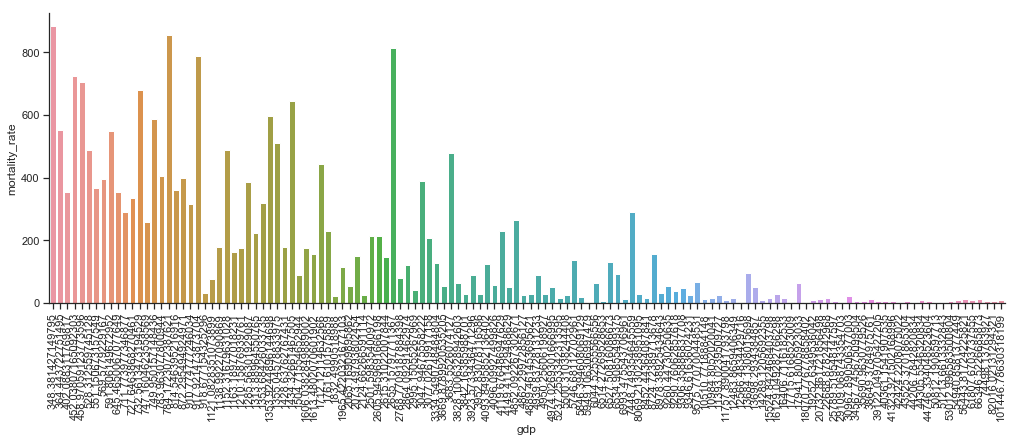

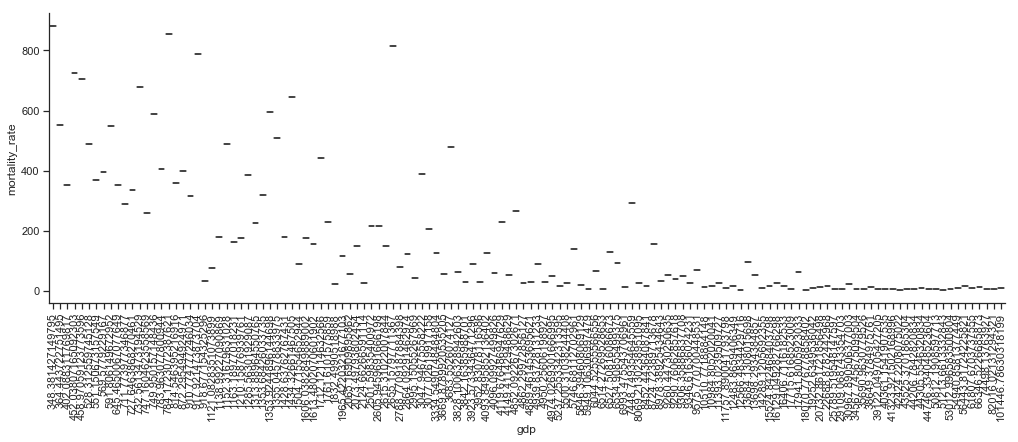

In [21]:
#And now the relationship between GDP per capita and mortality rate
mr_gdp=sns.catplot(y="mortality_rate", x="gdp", kind="bar", aspect=3, data=X_train);
mr_gdp.set_xticklabels(rotation=90)
mr_gdp=sns.catplot(y="mortality_rate", x="gdp", kind="box", aspect=3, data=X_train);
mr_gdp.set_xticklabels(rotation=90)

In [23]:
#Finally, lets check for all independent variable against our target
#This has been adjusted after repeated experiments to show the final value
X= X_train[['fertility_rate', 'gdp', 'healthcare', 'population', 'hc_expend']]
y= X_train['mortality_rate']
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mortality_rate   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           5.55e-44
Time:                        17:59:01   Log-Likelihood:                -818.17
No. Observations:                 132   AIC:                             1646.
Df Residuals:                     127   BIC:                             1661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fertility_rate    17.9739      0.787     22.831      0.000      16.416      19.532
gdp               -0.0015      0.001     -1.063      0.290      -0.004       0.001
healthcare        -4.0866     45.281     -0.090      0.928     -93.690      85.517
population      3.212e-08   6.19e-08      0.519      0.605   -9.04e-08    1.55e-07
hc_expend          0.0055      0.014      0.393      0.695      -0.022       0.033
==============================================================================
Omnibus:                       18.817   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.318
Skew:                           0.440   Prob(JB):                     1.60e-12
Kurtosis:                       6.017   Cond. No.                     7.46e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#Now lets check for regression status
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
model= linreg.fit(X_train, y_train)

y_hat_train= linreg.predict(X_train)
y_hat_test= linreg.predict(X_test)

In [25]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [26]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

132 132 33 33


In [27]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2) / len(y_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print("Train MSE", mse_train)
print("Test MSE", mse_test)
print("Train RMSE", rmse_train)
print("Test RMSE", rmse_test)

Train MSE mortality_rate    3.185401e-22
dtype: float64
Test MSE mortality_rate    2.104123e-23
dtype: float64
Train RMSE mortality_rate    1.784769e-11
dtype: float64
Test RMSE mortality_rate    4.587072e-12
dtype: float64


In [28]:
'''Our RMSE for both train and test are very similar to each other and are very small. This shows that our model is working and is good at predicting mortality rate given our independent variables'''

'Our RMSE for both train and test are very similar to each other and are very small. This shows that our model is working and is good at predicting mortality rate given our independent variables'

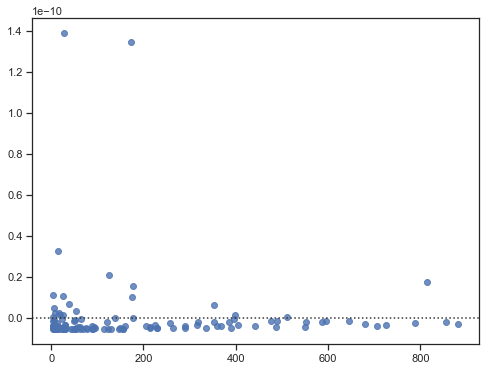

In [29]:
#Finally, lets check for residual regression line of our predicted vs expected
y= y_hat_train - y_train
sns.residplot(y_train, y_hat_train, data=data)

In [30]:
'''Beside a few outliers, we see that most of our residual regression line is close to 0. That is great news for our model'''

'Beside a few outliers, we see that most of our residual regression line is close to 0. That is great news for our model'